In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from model_spec import model_spec
from pol_model import load_bands, model_p, get_a_b, fit_pol, pol_plot
from draine_dust_2D import draine_dust
from scipy.optimize import minimize, LinearConstraint

In [2]:
#The measured values in each band. 
p_measured = np.array([0.0973, 0.1085, 0.1466])
p_unc = np.array([0.0037, 0.0023, 0.0041])

## Model the SDSS Spectrum

In [3]:
spec, model = model_spec()

In [4]:
#Assume that Lyman alpha is also polarized in the same manner as all the other emission lines. 
model.multi_line[0].pol = True
model.multi_line[1].pol = True

## Pol Model General Functions

In [5]:
dust_types = ["SMC", "LMC", "MW"]
bands = load_bands()

## Model the Broad-band polarizations

In [6]:
def chi2_dust_dust(x, dust, spec):
    phi = x[3]
    theta = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    a, b = get_a_b(theta, theta, bands, spec, model)
    p_mod = np.zeros(3)
    for j in range(3):
        p_mod[j] = model_p(x[:3], a[j], b[j])
    return np.sum(((p_measured-p_mod)/p_unc)**2)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 25.490436562628837
       x: [ 9.667e-01  1.000e+00  8.654e+01  8.473e+01]
     nit: 18
     jac: [-3.787e-02 -1.822e+02  7.427e-04 -5.729e-04]
    nfev: 96
    njev: 18
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.3047160627673292e-08
       x: [ 9.856e-01  3.302e-01  7.059e+01  1.286e+02]
     nit: 12
     jac: [-9.950e-03  4.485e-03  5.471e-05  3.943e-04]
    nfev: 69
    njev: 12
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 22.38155184708699
       x: [ 1.000e+00  1.000e+00  8.133e+01  7.821e+01]
     nit: 42
     jac: [-2.158e+02 -3.452e+01 -3.238e-04 -5.317e-05]
    nfev: 222
    njev: 42


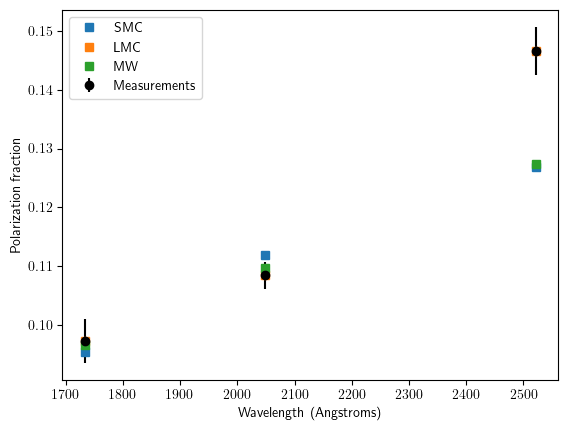

In [7]:
xopt_dd, mod_p_dd = fit_pol(chi2_dust_dust, dust_types, bands, spec, model)
pol_plot(mod_p_dd, p_measured, p_unc, spec, dust_types)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 25.49043620280083
       x: [ 9.667e-01  1.000e+00  8.654e+01  8.473e+01]
     nit: 20
     jac: [-8.865e-03 -1.822e+02 -2.623e-05 -8.082e-05]
    nfev: 105
    njev: 20
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 592.3641796960987
       x: [ 1.000e+00  9.487e-01  8.133e+01  7.248e+01]
     nit: 14
     jac: [-4.431e+02 -5.434e-02 -6.561e-04 -2.594e-04]
    nfev: 78
    njev: 14
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 22.381552051849173
       x: [ 1.000e+00  1.000e+00  8.133e+01  7.821e+01]
     nit: 28
     jac: [-2.157e+02 -3.457e+01  3.731e-04  3.300e-04]
    nfev: 146
    njev: 28


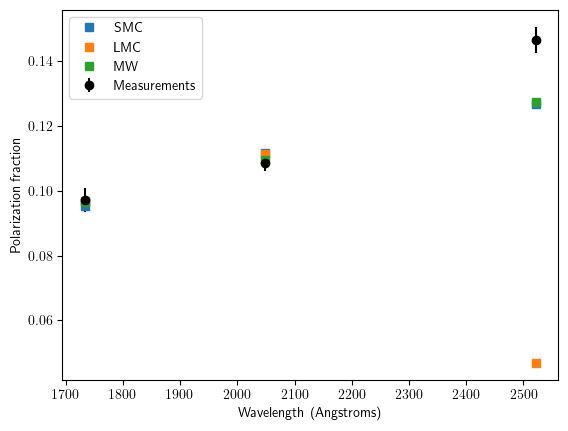

In [8]:
xopt_dd_fw, mod_p_dd_fw = fit_pol(chi2_dust_dust, dust_types, bands, spec, model, force_forward=True)
pol_plot(mod_p_dd_fw, p_measured, p_unc, spec, dust_types)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 29.700408938747767
       x: [ 9.542e-01  1.000e+00  8.757e+01  9.000e+01]
     nit: 15
     jac: [ 4.631e-02 -1.992e+02 -1.080e-03  1.682e+00]
    nfev: 81
    njev: 15
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.0050845108191442e-07
       x: [ 9.747e-01  2.332e-01  7.784e+01  1.289e+02]
     nit: 10
     jac: [ 2.943e-02 -8.367e-03 -5.224e-05  1.063e-03]
    nfev: 59
    njev: 10
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 82.3055475510158
       x: [ 1.000e+00  1.000e+00  8.201e+01  9.000e+01]
     nit: 12
     jac: [-1.766e+02 -1.599e+02 -4.377e-04  1.204e+01]
    nfev: 57
    njev: 11


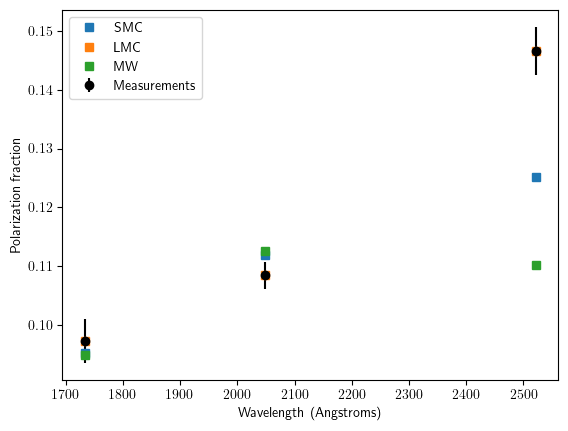

In [10]:
xopt_dd_bw, mod_p_dd_bw = fit_pol(chi2_dust_dust, dust_types, bands, spec, model, force_backward=True, x0=np.array([0.5, 0.3, 80., 130.]))
pol_plot(mod_p_dd_bw, p_measured, p_unc, spec, dust_types)

### Dust for continuum and Gas for Broad Lines.

In [ ]:
def get_pmod(x, dust, spec, model):
    phi = x[3]
    theta_A = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    theta_B = np.ones(len(spec.lam_rest))
    a, b = get_a_b(theta_A, theta_B, bands, spec, model)
    p_mod = np.zeros(3)
    for j in range(3):
        p_mod[j] = model_p(x[:3], a[j], b[j])
    return p_mod

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 10.74944015551948
       x: [ 1.000e+00  4.971e-01  7.998e+01  8.692e+01]
     nit: 26
     jac: [-2.028e+02  2.723e-02 -1.410e-03  1.954e-04]
    nfev: 144
    njev: 26
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0185790215008137e-09
       x: [ 9.960e-01  7.426e-02  8.998e+01  1.283e+02]
     nit: 12
     jac: [ 1.138e-03 -2.783e-03 -6.612e-09 -1.102e-04]
    nfev: 65
    njev: 12
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 19.27061638182384
       x: [ 1.000e+00  3.899e-01  7.656e+01  7.859e+01]
     nit: 39
     jac: [-2.600e+02 -3.521e-03  1.788e-05  9.036e-05]
    nfev: 209
    njev: 39


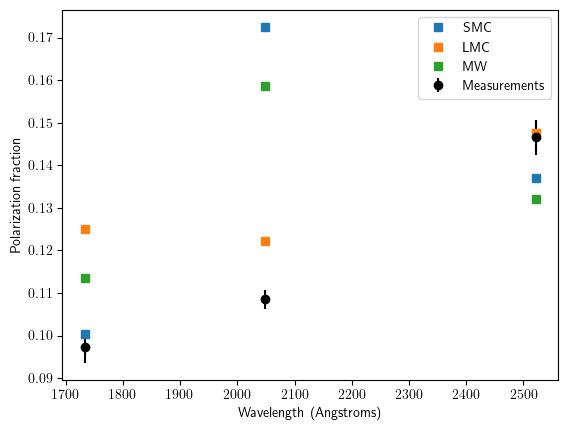

In [15]:
xopt_dg, mod_p_dg = fit_pol(chi2_dust_gas, dust_types, bands, spec, model, x0 = np.array([0.5, 0.9, 50., 60.]))
pol_plot(mod_p_dg, p_measured, p_unc, spec, dust_types)

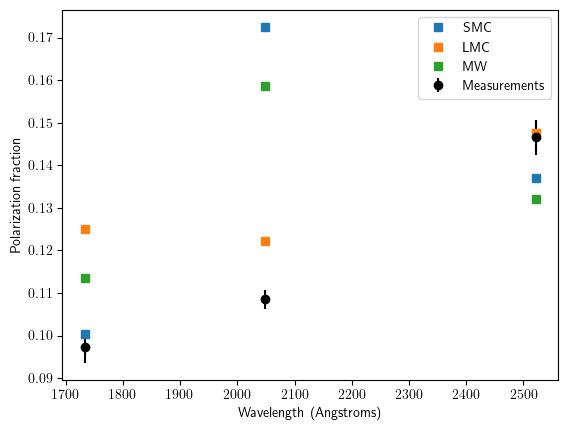

In [16]:
pol_plot(mod_p_dg, p_measured, p_unc, spec, dust_types)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 25.49043634561896
       x: [ 9.667e-01  1.000e+00  8.654e+01  8.473e+01]
     nit: 15
     jac: [ 5.162e-03 -1.822e+02  6.115e-04 -5.960e-05]
    nfev: 82
    njev: 15
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 593.4587681526722
       x: [ 1.000e+00  1.571e-01  9.000e+01  5.032e+01]
     nit: 21
     jac: [-6.101e+02 -8.820e-03 -2.289e-05  8.850e-04]
    nfev: 121
    njev: 21
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 22.38155213234634
       x: [ 1.000e+00  1.000e+00  8.133e+01  7.820e+01]
     nit: 23
     jac: [-2.158e+02 -3.452e+01  3.724e-04 -4.439e-04]
    nfev: 121
    njev: 23


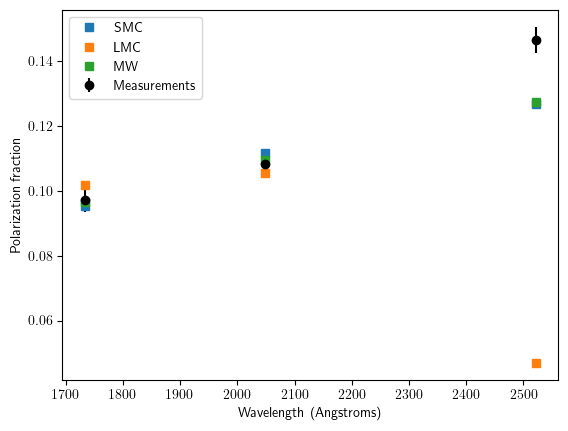

In [14]:
xopt_dg_fw, mod_p_dg_fw = fit_pol(chi2_dust_gas, dust_types, bands, spec, model, x0 = np.array([0.5, 0.9, 50., 60.]), force_forward=True)
pol_plot(mod_p_dg_fw, p_measured, p_unc, spec, dust_types)

In [ ]:
#Force front scattering only. 
dust_types = ["SMC", "LMC", "MW"]
mod_p = np.zeros((len(dust_types),len(bands)))
for k, dust_type in enumerate(dust_types):

    dust = draine_dust(type=dust_type)

    x0 = np.array([0.5, 0.5, 90., 60.])
    G = np.identity(x0.shape[0])
    min_vals = [0., 0., 0., 0.]
    max_vals = [1., 1., 360., 90.]
    lincon = LinearConstraint(G, min_vals, max_vals)
    xopt = minimize(chi2, x0=x0, constraints=lincon, args=(dust, spec))

    print(xopt)

    phi = xopt.x[3]
    theta = dust.pfrac(spec.lam_rest.to(u.um).value, phi).flatten()
    a, b = get_a_b(theta, theta, bands, spec, model)

    for j in range(len(bands)):
        mod_p[k,j] = model_p(xopt.x[:3], a[j], b[j])
        print(mod_p[k,j])

    #pol_plot(p_measured, p_unc, mod_p, spec)